In [1]:
# *Dataset에 대해 추가 조사 필요
# 로이터 데이터셋
# 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 
# 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 
# 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가
# 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.

#- 실제 데이터에 대한 상세 기술
# Out [6]

#- 예측하고자 하는 방법/방향 기술
# 중간층 레이어 차원을 다르게 해서 어떤 학습의 차이를 보이는지 비교 및 분석

#- 학습을 위해 데이터가 어떻게 가공/처리 되었는지 기술
# One-hot encoding

# - 사용된 모델의 입력층과 출력층에 대한 기술
# 입력층 : 64차원의 relu 활성화 함수 사용
# 출력층 : 46차원의 softmax 활성화 함수 사용, 46개의 출력 클래스에 대한 확률 분포 출력

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data)

8982

In [5]:
len(test_data)

2246

In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [9]:

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0728 17:04:42.669140  9608 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 17:04:42.696724  9608 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 17:04:42.704042  9608 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0728 17:04:47.737886  9608 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 17:04:47.775250  9608 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:3564: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0728 17:04:56.352121  9608 deprecation.py:323] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 17:04:56.487953  9608 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 291us/step - loss: 2.5638 - acc: 0.4986 - val_loss: 1.6826 - val_acc: 0.6410
Epoch 2/20
7982/7982 [==============================] - 2s 286us/step - loss: 1.3823 - acc: 0.7130 - val_loss: 1.2726 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 2s 198us/step - loss: 1.0226 - acc: 0.7836 - val_loss: 1.1040 - val_acc: 0.7570
Epoch 4/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.8040 - acc: 0.8322 - val_loss: 1.0015 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 2s 234us/step - loss: 0.6386 - acc: 0.8668 - val_loss: 0.9660 - val_acc: 0.7850
Epoch 6/20
7982/7982 [==============================] - 2s 199us/step - loss: 0.5170 - acc: 0.8915 - val_loss: 0.9115 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 207us/step - loss: 0.4140 - acc: 0.9133 - val_loss: 0.9035 - val_acc: 0.8040


In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
import matplotlib.pyplot as plt

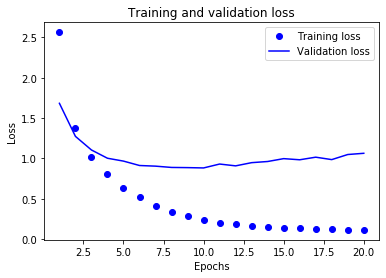

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

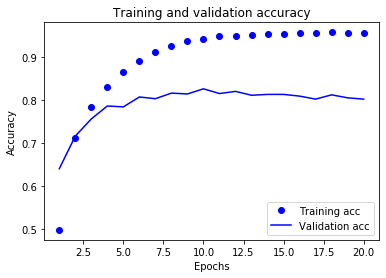

In [22]:

plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

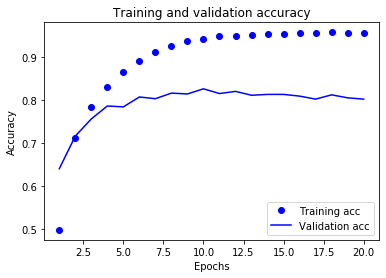

In [23]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 293us/step - loss: 2.8109 - acc: 0.5153 - val_loss: 1.8806 - val_acc: 0.6360
Epoch 2/9
7982/7982 [==============================] - 2s 241us/step - loss: 1.4956 - acc: 0.7042 - val_loss: 1.3289 - val_acc: 0.7090
Epoch 3/9
7982/7982 [==============================] - 3s 335us/step - loss: 1.0630 - acc: 0.7765 - val_loss: 1.1252 - val_acc: 0.7650
Epoch 4/9
7982/7982 [==============================] - 2s 246us/step - loss: 0.8146 - acc: 0.8335 - val_loss: 1.0348 - val_acc: 0.7850
Epoch 5/9
7982/7982 [==============================] - 2s 239us/step - loss: 0.6474 - acc: 0.8670 - val_loss: 0.9701 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 2s 198us/step - loss: 0.5171 - acc: 0.8948 - val_loss: 0.9226 - val_acc: 0.8170
Epoch 7/9
7982/7982 [==============================] - 2s 199us/step - loss: 0.4185 - acc: 0.9131 - val_loss: 0.8918 - val_acc: 0.8150
Epoch 8

In [25]:
results

[1.006739084994485, 0.7827248441674087]

In [26]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18967052537845058

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

1.0000001

In [30]:
np.argmax(predictions[0])

3

In [31]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [32]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 196us/step - loss: 3.1727 - acc: 0.2334 - val_loss: 2.4312 - val_acc: 0.4460
Epoch 2/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.7991 - acc: 0.6128 - val_loss: 1.5441 - val_acc: 0.6420
Epoch 3/20
7982/7982 [==============================] - 1s 155us/step - loss: 1.3241 - acc: 0.6799 - val_loss: 1.3899 - val_acc: 0.6780
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.1480 - acc: 0.7180 - val_loss: 1.3354 - val_acc: 0.6910
Epoch 5/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.0296 - acc: 0.7409 - val_loss: 1.2963 - val_acc: 0.7020
Epoch 6/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.9366 - acc: 0.7655 - val_loss: 1.2900 - val_acc: 0.7010
Epoch 7/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.8613 - acc: 0.7861 - val_loss: 1.2964 - val_acc: 0.7080


In [34]:
results

[1.006739084994485, 0.7827248441674087]